<h2> Load librairies </h2>


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

<h2> Manipulation de dataset 1 : </h2>


In [70]:
# Importing the dataset
dataset = pd.read_csv('Dataset1.csv')
#Importer et visualiser le contenu du dataset.
dataset.head(20)

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11,1.2040,0
1,213,7.5,338,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29,1.8232,0
2,163,9.6,718,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03,1.9092,0
3,157,6.8,475,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82,1.6168,0
4,270,9.9,444,7.63,0.40,0.86,11.80,0.25,0.76,1.69,2.43,2.26,1.4792,1
5,220,8.6,444,7.43,0.65,0.72,11.70,0.37,0.66,0.90,2.19,1.82,1.2384,0
6,220,7.2,222,7.62,0.43,0.81,7.40,0.34,0.69,1.05,2.00,1.88,1.3932,0
7,207,7,401,7.63,0.59,0.69,7.60,0.32,0.68,0.62,2.43,1.68,1.1868,0
8,333,14.9,422,8.26,0.48,NaN,8.45,0.51,3.32,1.08,9.21,0.32,2.0124,2
9,289,8.6,560,7.58,0.44,0.67,7.30,0.63,0.66,0.94,2.43,1.79,1.1524,1


## Description globale du dataset

In [3]:
# Fournir une description globale du dataset.

def Description(dataset):
    print("Description du dataset :")
    print(dataset.describe())
    print("Description de chaque attribut du dataset :")
    print(dataset.info())
    print("Nombre de valeurs manquantes :")
    print(dataset.isnull().sum())
    print("Nombre de valeurs dupliquées :")
    print(dataset.duplicated().sum())
    print("Nombre de valeurs uniques :")
    print(dataset.nunique())
    print("Valeurs uniques de chaque attribut :")
    for col in dataset.columns:
        print(col, dataset[col].unique())
    print("Valeurs manquantes :")
    print(dataset.isna().sum())
   
 

Desccription_table = pd.DataFrame({
    'Description' : [  'Number of rows','Number of columns' ,
     'Nombre de valeurs manquantes', 'Nombre de valeurs dupliquées', 'Nombre de valeurs uniques',
      'Data types'  , 'Valeurs uniques de chaque attribut'],
    'Valeurs' : [ dataset.shape[0],dataset.shape[1] ,
     dataset.isnull().sum().tolist(), dataset.duplicated().sum(),  dataset.nunique().sum(), 
      dataset.dtypes.tolist() , dataset.isna().sum().tolist()]

})
Desccription_table


,Description,Valeurs
0,Number of rows,885
1,Number of columns,14
2,Nombre de valeurs manquantes,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]"
3,Nombre de valeurs dupliquées,3
4,Nombre de valeurs uniques,1866
5,Data types,"[int64, object, int64, float64, float64, float..."
6,Valeurs uniques de chaque attribut,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]"


In [4]:
# Fournir une description de chaque attribut du dataset.
Description_measures = {'Measures' :[ 'Number of rows','Number of columns' , 'Data types'  , 'Valeurs uniques de chaque attribut' ,
    'Number of duplicates' , 'Number of missing values' , ]}

for col in dataset.columns[0:]:
    Description_measures[col]=[
    dataset.shape[0], 
    dataset.shape[1],
    dataset.dtypes[col],
    dataset[col].nunique() , 
    dataset[col].duplicated().sum() ,
    dataset[col].isnull().sum(),
    ]
Description_measures = pd.DataFrame(Description_measures)
Description_measures

,Measures,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,Number of rows,885,885,885,885,885,885,885,885,885,885,885,885,885,885
1,Number of columns,14,14,14,14,14,14,14,14,14,14,14,14,14,14
2,Data types,int64,object,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
3,Valeurs uniques de chaque attribut,61,93,63,107,71,68,153,70,387,166,429,127,68,3
4,Number of duplicates,824,792,822,778,814,816,732,815,498,718,456,758,817,882
5,Number of missing values,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [72]:

# convert elements of the dataset column 'P' from object to a type float64
dataset['P'] = pd.to_numeric(dataset['P'],errors='coerce')
# print(dataset['P'])
dataset.head(20)

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11,1.2040,0
1,213,7.5,338,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29,1.8232,0
2,163,9.6,718,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03,1.9092,0
3,157,6.8,475,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82,1.6168,0
4,270,9.9,444,7.63,0.40,0.86,11.80,0.25,0.76,1.69,2.43,2.26,1.4792,1
5,220,8.6,444,7.43,0.65,0.72,11.70,0.37,0.66,0.90,2.19,1.82,1.2384,0
6,220,7.2,222,7.62,0.43,0.81,7.40,0.34,0.69,1.05,2.00,1.88,1.3932,0
7,207,7.0,401,7.63,0.59,0.69,7.60,0.32,0.68,0.62,2.43,1.68,1.1868,0
8,333,14.9,422,8.26,0.48,NaN,8.45,0.51,3.32,1.08,9.21,0.32,2.0124,2
9,289,8.6,560,7.58,0.44,0.67,7.30,0.63,0.66,0.94,2.43,1.79,1.1524,1


In [8]:
 # Calculer les mesures de tendance centrale et de dispersion pour chaque attribut du dataset.
def Calculate_Measure(dataset):
    # Create an empty dictionary to store the measures
    measures = {'Mesure': ['Moyenne', 'Médiane', 'Variance', 'Q0:Min', 'Q1', 'Q2', 'Q3', 'Q4:Max' , 'Ecart-type', 'Skewness', 'Kurtosis'  ]}
    
    # Loop through each column in the dataset
    for col in dataset.columns[:]:
        # Calculate the required measures for each column and append to the dictionary
        measures[col] = [
            dataset[col].mean().round(2), 
            round(dataset[col].median(), 2),
            round(dataset[col].var(), 2), 
            sorted(dataset[col])[0], 
            dataset[col].quantile(0.25),
            dataset[col].quantile(0.5),
            dataset[col].quantile(0.75),
            sorted(dataset[col])[-1],
            round(dataset[col].std(), 2),
            round(dataset[col].skew(), 2),
            dataset[col].kurtosis(),
        ]
    
    # Create a DataFrame from the dictionary
    Mesure_tendance_centrale = pd.DataFrame(measures)
    
    return Mesure_tendance_centrale

# Assuming 'dataset' is your DataFrame
Mesure_tendance_centrale = Calculate_Measure(dataset)
Mesure_tendance_centrale



,Mesure,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,Moyenne,247.000000,14.560000,501.340000,7.510000,0.540000,0.620000,7.5500,0.47000,4.130000,0.950000,8.65000,0.590000,1.060000,0.59000
1,Médiane,257.000000,8.100000,475.000000,7.500000,0.550000,0.590000,6.6400,0.36000,3.560000,0.930000,8.34000,0.410000,1.010000,1.00000
2,Variance,5984.460000,480.970000,16668.000000,0.220000,0.020000,0.710000,19.5200,3.57000,9.660000,0.220000,18.50000,0.330000,2.090000,0.33000
3,Q0:Min,6.000000,2.900000,11.000000,0.900000,0.100000,0.100000,0.6400,0.07000,0.210000,0.090000,0.11000,0.060000,0.172000,0.00000
4,Q1,201.000000,6.800000,412.000000,7.350000,0.430000,0.380000,4.7000,0.28000,2.050000,0.630000,6.21000,0.270000,0.653600,0.00000
5,Q2,257.000000,8.100000,475.000000,7.500000,0.550000,0.590000,6.6400,0.36000,3.560000,0.930000,8.34000,0.410000,1.014800,1.00000
6,Q3,307.000000,10.700000,581.000000,7.630000,0.640000,0.780000,8.7500,0.47000,6.320000,1.250000,11.47000,0.610000,1.341600,1.00000
7,Q4:Max,383.000000,125.000000,1560.000000,11.150000,0.950000,24.000000,31.0000,42.00000,44.000000,NaN,31.00000,2.820000,41.280000,2.00000
8,Ecart-type,77.360000,21.930000,129.100000,0.460000,0.140000,0.840000,4.4200,1.89000,3.110000,0.470000,4.30000,0.570000,1.450000,0.58000
9,Skewness,-0.630000,3.410000,0.980000,-5.100000,0.100000,24.380000,2.4600,20.94000,3.590000,0.430000,0.60000,2.120000,24.370000,0.36000


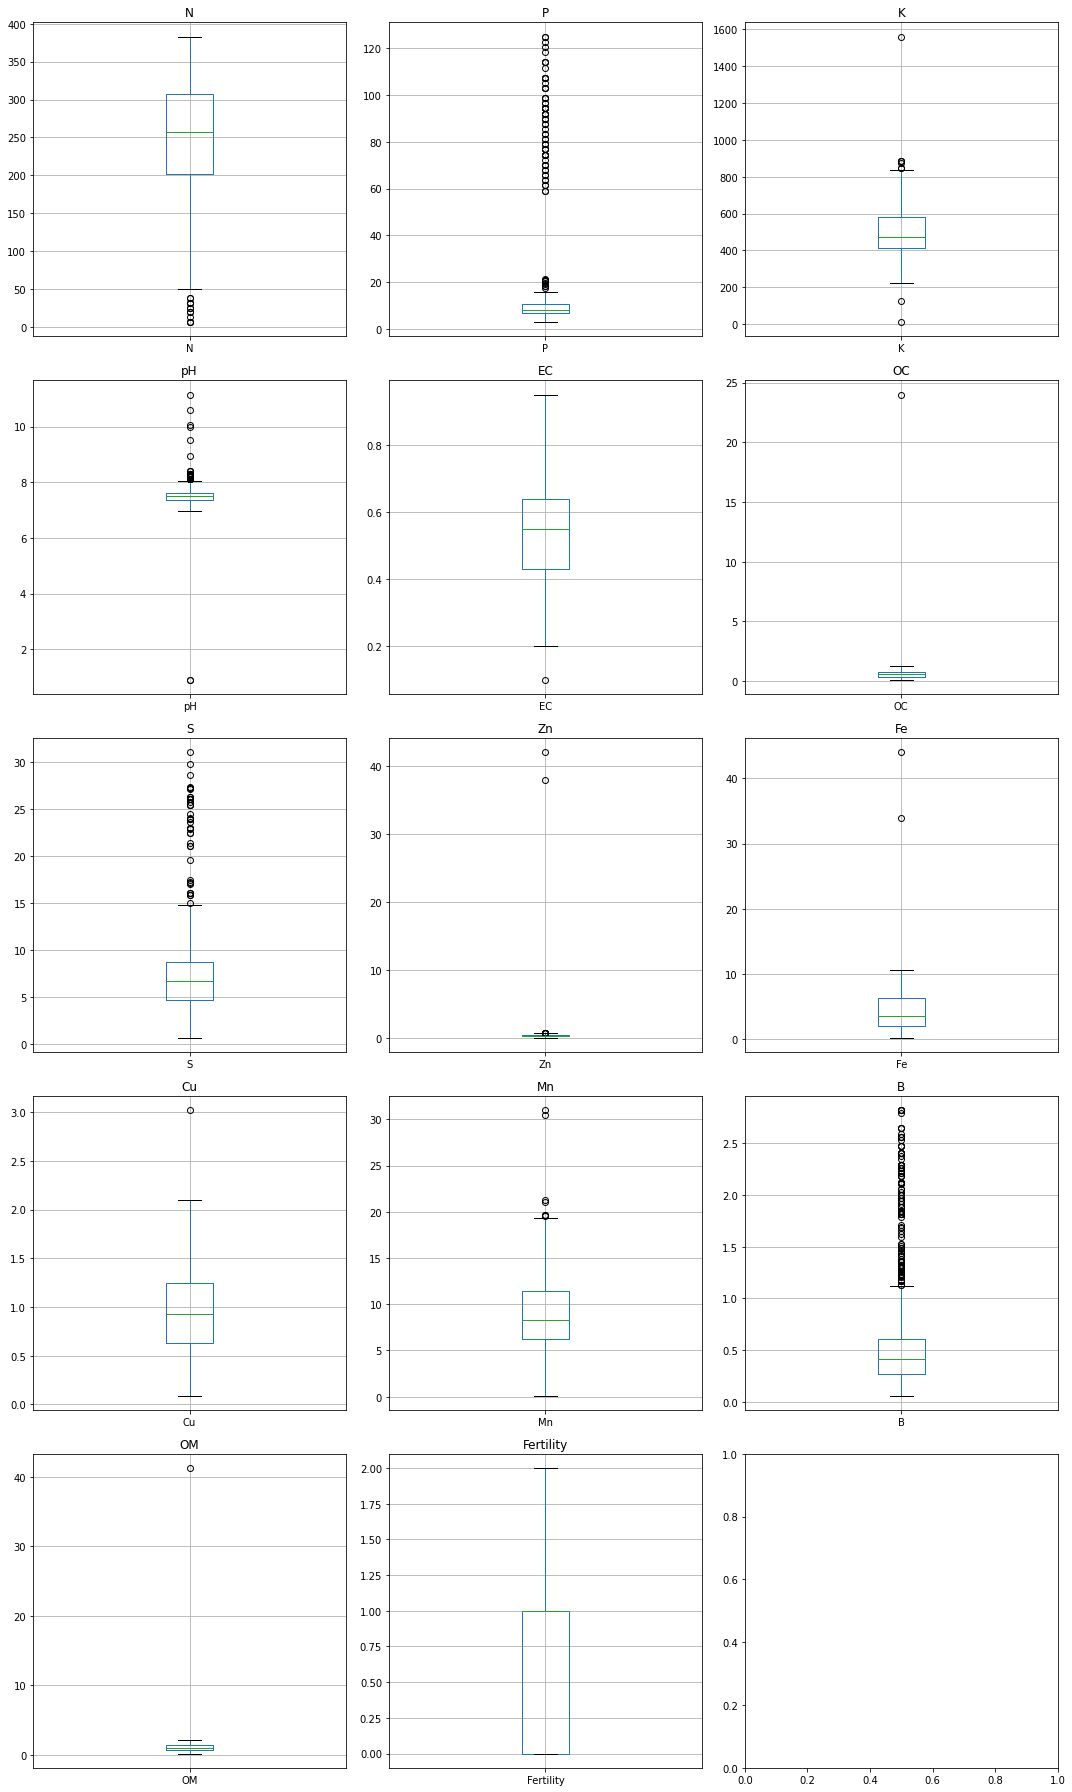

In [9]:
import matplotlib.pyplot as plt

def create_box_plots():
    num_cols = len(dataset.columns)
    num_rows = num_cols // 3 + (num_cols % 3 > 0)  # Calculate the number of rows needed
    
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))  # Create subplots
    
    for i, col in enumerate(dataset.columns):
        ax = axes[i // 3, i % 3] if num_rows > 1 else axes[i % 3]  # Get the current axis
        dataset.boxplot(column=col, ax=ax)
        ax.set_title(col)  # Set the title of the subplot
    
    plt.tight_layout()
    plt.show()

create_box_plots()


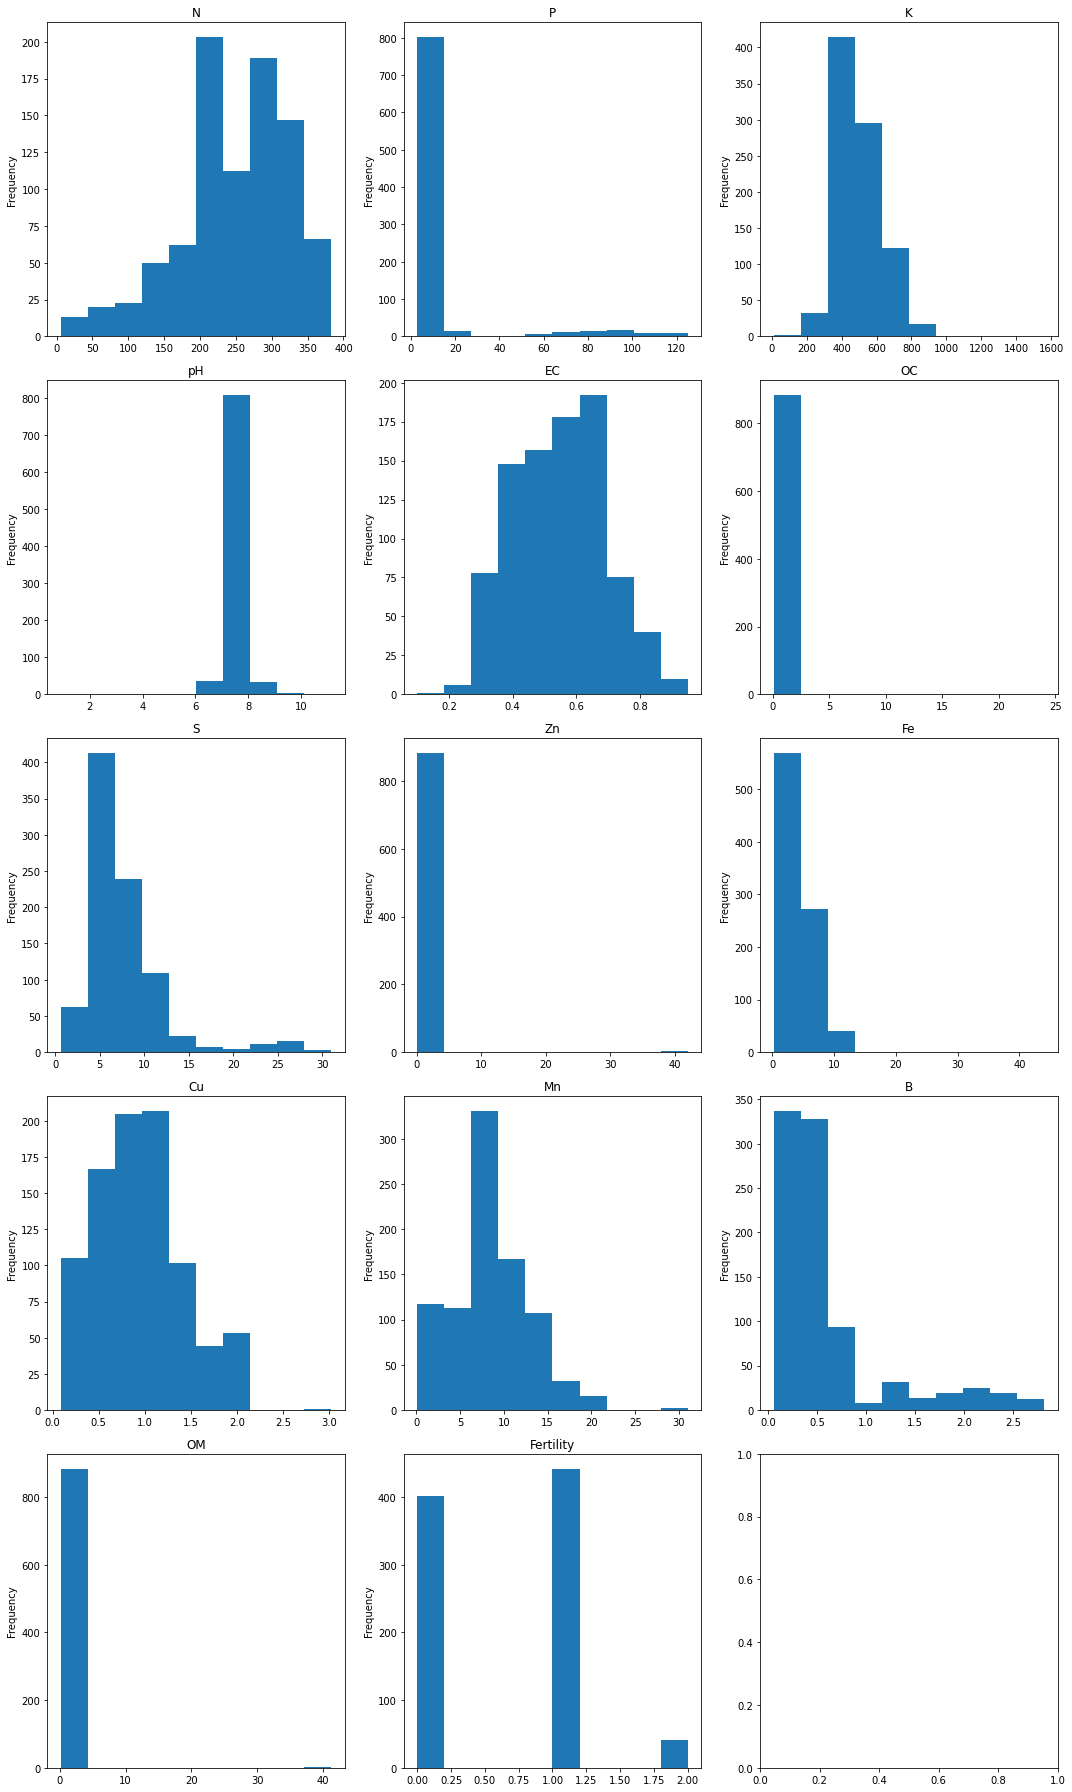

In [10]:
import matplotlib.pyplot as plt

def create_histograms():
    num_cols = len(dataset.columns[:])
    num_rows = num_cols // 3 + (num_cols % 3 > 0)  # Calculate the number of rows needed
    
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))  # Create subplots
    
    for i, col in enumerate(dataset.columns[:]):
        ax = axes[i // 3, i % 3] if num_rows > 1 else axes[i % 3]  # Get the current axis
        dataset[col].plot(kind='hist', ax=ax, title=col)
    
    plt.tight_layout()
    plt.show()

create_histograms()


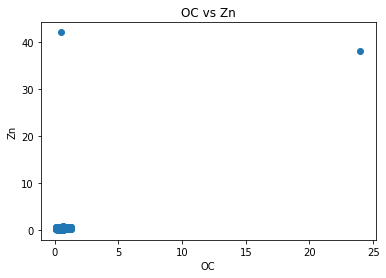

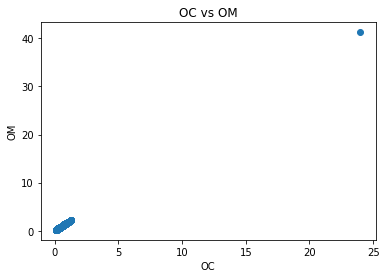

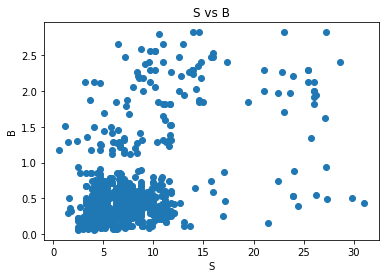

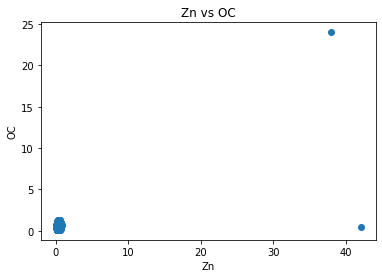

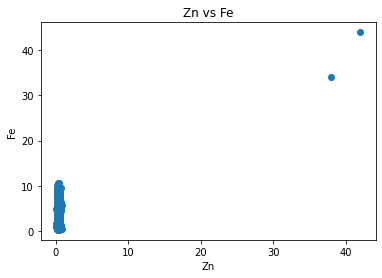

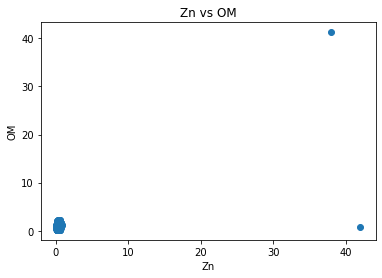

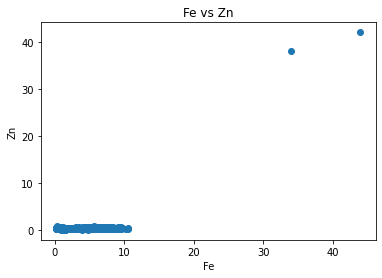

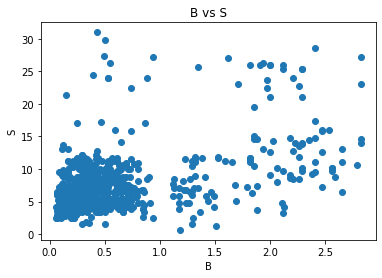

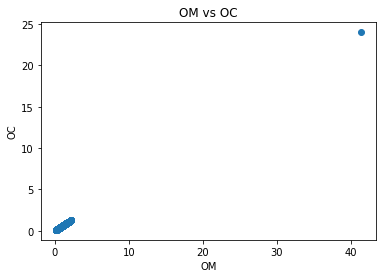

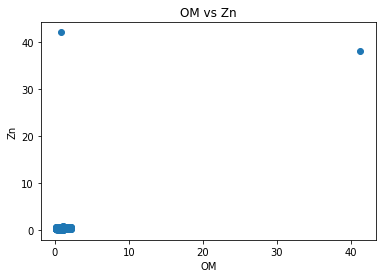

In [73]:
# Construire et afficher des diagrammes de dispersion des données et en déduire les 
# corrélations entre les propriétés du sol   

# def create_scatter_plots() :
#   num_cols = len(dataset.columns[:13])
#   num_rows = num_cols // 2 + (num_cols % 2 > 0)  # Calculate the number of rows needed
#   fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))  # Create subplots
  
#   for i, col1 in enumerate(dataset.columns[:13]):
#      for j, col2 in enumerate(dataset.columns[:13]):
#       # verify the degree of correlation between the two columns
#       if dataset[col1].corr(dataset[col2]) > 0.4  and col1 != col2 :
#         ax = axes[i // 2, i % 2] if num_rows > 1 else axes[i % 2]
#         dataset.plot.scatter(x=col1, y=col2, ax=ax,  title=col1+' vs ' +col2)
#   plt.tight_layout()
#   plt.show()
# create_scatter_plots()

# Construire et afficher des diagrammes de dispersion des données et en déduire les  corrélations entre les propriétés du sol
def create_scatter_plots():
    for i , col1 in enumerate(dataset.columns[:13]):
        for j , col2 in enumerate(dataset.columns[:13]):
            if dataset[col1].corr(dataset[col2]) > 0.4 and col1 != col2 :
                plt.scatter(dataset[col1], dataset[col2])
                plt.title(col1+' vs '+col2)
                plt.xlabel(col1)
                plt.ylabel(col2)
                plt.show()
create_scatter_plots()


In [74]:
# calculate matrice de correlation
corr_matrix = dataset.corr()
corr_matrix.head()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
N,1.000000,-0.010895,0.052113,0.078242,-0.005028,0.029562,-0.126181,0.054002,0.073395,-0.185161,0.102782,-0.168323,0.030360,0.708594
P,-0.010895,1.000000,0.082684,0.005257,0.005320,-0.009008,-0.099644,-0.016847,0.141300,0.055081,0.045153,-0.097548,-0.008995,0.210838
K,0.052113,0.082684,1.000000,0.009780,-0.098793,-0.030426,0.017687,-0.003273,-0.055885,-0.010315,0.025181,0.102148,-0.030868,0.065766
pH,0.078242,0.005257,0.009780,1.000000,0.058119,-0.016271,0.011906,-0.008345,-0.033637,-0.001358,-0.008453,0.008019,-0.015047,0.088682
EC,-0.005028,0.005320,-0.098793,0.058119,1.000000,-0.007191,0.051240,-0.035822,-0.043280,0.033859,-0.045700,-0.002210,-0.007524,-0.024835


<h1> 2. Prétraitement des données </h1>

<h3>Traitement des valeurs manquantes et aberrantes </h3>

In [75]:
# Choix de la méthode de remplacement des valeurs manquantes
# Remplacer les valeurs manquantes par la moyenne de la colonne
dataset.fillna(dataset.mean(), inplace=True) 
dataset.head()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,1.2040,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,1.8232,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,1.9092,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,1.6168,0
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26,1.4792,1


<h2>Traitement des valeurs aberrantes  </h2>
<h4> Utilisation de techniques robustes </h4>

In [76]:
# Choix de la méthode de traitement des valeurs aberrantes 
# Utilisation de techniques robustes  : MAD (Median Absolute Deviation) 
def mad_based_outlier(data, threshold=3.5): 
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    modified_z_scores = 0.6745 * (data - median) / mad
    return np.abs(modified_z_scores) > threshold

def handle_outliers(dataset, threshold=3.5, treatment_method='median'):
    cleaned_data = dataset.copy()
    for col in dataset.columns: # Loop through all columns in the dataset
        if dataset[col].dtype != 'object':
            outliers = mad_based_outlier(dataset[col], threshold=threshold)
            if outliers.any():
                if treatment_method == 'median':
                    median_value = np.median(dataset[col])
                    cleaned_data.loc[outliers, col] = median_value
                elif treatment_method == 'mean':
                    mean_value = np.mean(dataset[col])
                    cleaned_data.loc[outliers, col] = mean_value         
                else:
                    raise ValueError('Please select a valid treatment method.')
    return cleaned_data

# Threshold and treatment_method can be adjusted based on your specific dataset and context
dataset = handle_outliers(dataset, threshold=3.5, treatment_method='mean') 

dataset.head()


,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,138,8.6,560.0,7.46,0.62,0.70,5.900000,0.24,0.31,0.77,8.71,0.110000,1.2040,0
1,213,7.5,338.0,7.62,0.75,1.06,7.545808,0.30,0.86,1.54,2.89,0.593424,1.8232,0
2,163,9.6,718.0,7.59,0.51,1.11,14.300000,0.30,0.86,1.57,2.70,0.593424,1.9092,0
3,157,6.8,475.0,7.64,0.58,0.94,7.545808,0.34,0.54,1.53,2.65,0.593424,1.6168,0
4,270,9.9,444.0,7.63,0.40,0.86,11.800000,0.25,0.76,1.69,2.43,0.593424,1.4792,1


<h3> Réduction des données </h3>

In [77]:
# Réduction des données (élimination des redondances) horizontales / verticales.

# Drop duplicate rows( Elimination des redondances horizontales)
dataset.drop_duplicates(inplace=True) # Drop duplicate rows inplace (in the same DataFrame)

# Drop duplicate columns (Elimination des redondances verticales)
dataset = dataset.T.drop_duplicates().T # Transpose, drop duplicates, transpose back
# dataset = dataset.loc[:,~dataset.columns.duplicated()] # Alternative method to drop duplicate columns

dataset.shape

(882, 14)

<h2>  Normalisation des données </h2>

<h3> Methode Min-Max </h3>

In [78]:
# Normalisation des données (Min-Max)
def normalize_min_max (collumn) : 
    min_value = dataset[collumn].min()  
    max_value = dataset[collumn].max()
    new_min = 0 
    new_max = 1 
    dataset[collumn] = (dataset[collumn] - min_value) / (max_value - min_value) * (new_max - new_min) + new_min
    return dataset[collumn] 

dataset_norm_min_max = dataset.copy()
 
for col in dataset_norm_min_max.columns[:]:
    dataset_norm_min_max[col] = normalize_min_max(col)
dataset_norm_min_max.head()


,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,0.350133,0.483051,0.569737,0.384615,0.611765,0.512821,0.313842,0.236111,0.009671,0.338308,0.405469,0.042373,0.512821,0.0
1,0.549072,0.389831,0.277632,0.507692,0.764706,0.820513,0.412041,0.319444,0.062863,0.721393,0.131070,0.452054,0.820513,0.0
2,0.416446,0.567797,0.777632,0.484615,0.482353,0.863248,0.815036,0.319444,0.062863,0.736318,0.122112,0.452054,0.863248,0.0
3,0.400531,0.330508,0.457895,0.523077,0.564706,0.717949,0.412041,0.375000,0.031915,0.716418,0.119755,0.452054,0.717949,0.0
4,0.700265,0.593220,0.417105,0.515385,0.352941,0.649573,0.665871,0.250000,0.053191,0.796020,0.109382,0.452054,0.649573,0.5


<h3>  z-score </h3>

In [79]:
#  Z-score

def normalize_z_score (collumn) :
    mean = dataset[collumn].mean()
    std = dataset[collumn].std()
    dataset[collumn] = (dataset[collumn] - mean) / std
    return dataset[collumn]

dataset_norm_z_score = dataset.copy()
 
for col in dataset_norm_z_score.columns[:]:
    dataset_norm_z_score[col] = normalize_z_score(col)
dataset_norm_z_score.head()


,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,-1.407163,-0.096565,0.484126,-0.163823,0.539398,0.367141,-0.360841,-1.136820,-1.434699,-0.391353,0.021513,-1.482949,0.364240,-1.023865
1,-0.437641,-0.472091,-1.320599,0.471949,1.458243,1.582163,0.237914,-0.644970,-1.224247,1.281883,-1.376136,0.798955,1.576648,-1.023865
2,-1.083989,0.244821,1.768569,0.352742,-0.238085,1.750917,2.695132,-0.644970,-1.224247,1.347074,-1.421764,0.798955,1.745038,-1.023865
3,-1.161551,-0.711062,-0.206873,0.551420,0.256677,1.177156,0.237914,-0.317071,-1.346692,1.260153,-1.433771,0.798955,1.172512,-1.023865
4,0.299196,0.347238,-0.458884,0.511685,-1.015569,0.907151,1.785616,-1.054845,-1.262511,1.607838,-1.486603,0.798955,0.903088,0.709434
